# Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/bitcoin_price.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


### Time Series Index

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3392 non-null   str    
 1   Open       3392 non-null   float64
 2   High       3392 non-null   float64
 3   Low        3392 non-null   float64
 4   Close      3392 non-null   float64
 5   Adj Close  3392 non-null   float64
 6   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1), str(1)
memory usage: 185.6 KB


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].head()

0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: Date, dtype: datetime64[us]

In [5]:
df = df.set_index(["Date"])

In [6]:
df.loc["2014-09-17"]

Open         4.658640e+02
High         4.681740e+02
Low          4.524220e+02
Close        4.573340e+02
Adj Close    4.573340e+02
Volume       2.105680e+07
Name: 2014-09-17 00:00:00, dtype: float64

In [7]:
# Importing the data setting date as index straight forward
df1 = pd.read_csv("./data/bitcoin_price.csv", index_col="Date", parse_dates=["Date"])
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [8]:
df.resample(rule="W").mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07
...,...,...,...,...,...,...
2023-12-03,38038.414062,38743.479353,37766.444196,38399.994978,38399.994978,1.919430e+10
2023-12-10,43002.227121,44027.167411,42586.383929,43538.877232,43538.877232,2.692909e+10
2023-12-17,42369.368862,42969.940848,41148.103237,42020.472656,42020.472656,2.407050e+10


### Data Analysis

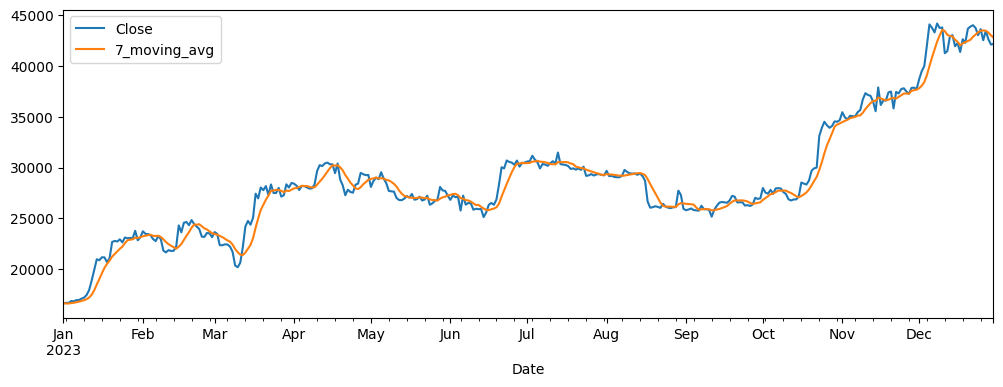

In [9]:
# Generate a 7-day rolling average

df["7_moving_avg"] = df["Close"].rolling(window=7).mean()

# plotting
df[["Close", "7_moving_avg"]].loc["2023"].plot(figsize=(12, 4));

In [10]:
# Find the month with the highest closing

df.resample(rule="ME").mean()["Close"].idxmax()

Timestamp('2021-11-30 00:00:00')

In [11]:
# Compute the percentage change for close observations
df["pct_change"] = df["Close"].pct_change(periods=1) * 100
df["pct_change"]

Date
2014-09-17         NaN
2014-09-18   -7.192558
2014-09-19   -6.984265
2014-09-20    3.573492
2014-09-21   -2.465854
                ...   
2023-12-26   -2.505525
2023-12-27    2.169436
2023-12-28   -1.876028
2023-12-29   -1.239690
2023-12-30    0.136582
Name: pct_change, Length: 3392, dtype: float64

In [12]:
df["daily_returns"] = df["Close"].diff(periods=1)
df["daily_returns"]

Date
2014-09-17            NaN
2014-09-18     -32.894012
2014-09-19     -29.644012
2014-09-20      14.108002
2014-09-21     -10.082977
                 ...     
2023-12-26   -1092.738281
2023-12-27     922.453125
2023-12-28    -815.000000
2023-12-29    -528.453125
2023-12-30      57.500000
Name: daily_returns, Length: 3392, dtype: float64

In [13]:
# Checking which days had more than 10% variation
df.loc[abs(df["pct_change"]) > 10].head() # abs to evaluate positive and negative 10%

,Open,High,Low,Close,Adj Close,Volume,7_moving_avg,pct_change,daily_returns
Date,,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570,55.865997
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686,-33.950012
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308,-41.934998
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862,-47.757996
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709,31.740997


### Data Visualization

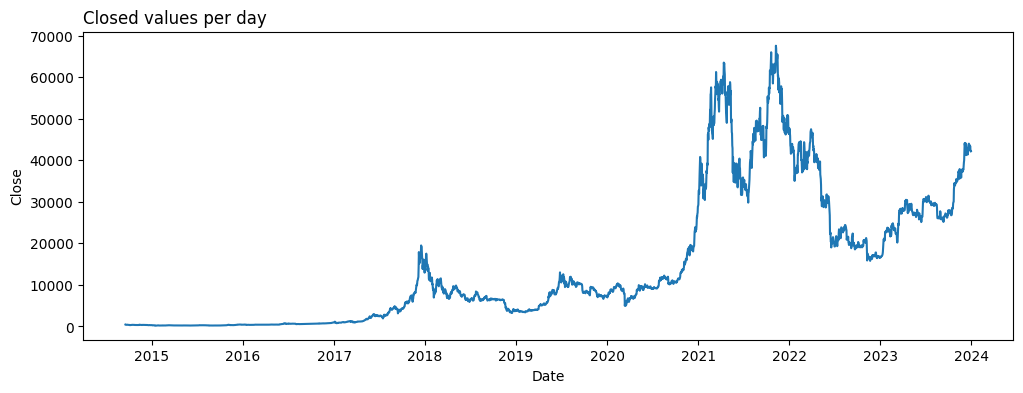

In [14]:
# Closing price plot

plt.figure(figsize=(12, 4))
sns.lineplot(
    data=df,
    x=df.index,
    y="Close"

)
plt.title("Closed values per day", loc="left")
plt.show()

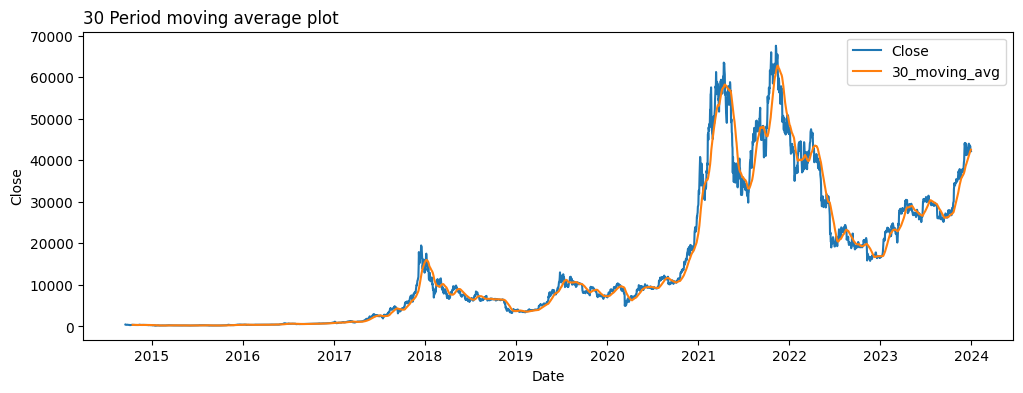

In [15]:
# Plotting rolling average of 30 periods

df["30_moving_avg"] = df["Close"].rolling(window=30).mean()

plt.figure(figsize=(12, 4))
sns.lineplot(
    data=df,
    x=df.index,
    y="Close",
    label="Close"

)
sns.lineplot(
    data=df,
    x=df.index,
    y="30_moving_avg",
    label="30_moving_avg"
)
plt.title("30 Period moving average plot", loc="left")
plt.legend()
plt.show()

In [16]:
df[["Close", "30_moving_avg"]].corr()

,Close,30_moving_avg
Close,1.000000,0.988016
30_moving_avg,0.988016,1.000000


### Data Manipulation

In [17]:
df.isnull().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
7_moving_avg      6
pct_change        1
daily_returns     1
30_moving_avg    29
dtype: int64

In [20]:
df["7_moving_avg"].head(10)

Date
2014-09-17           NaN
2014-09-18           NaN
2014-09-19           NaN
2014-09-20           NaN
2014-09-21           NaN
2014-09-22           NaN
2014-09-23    417.462572
2014-09-24    412.586997
2014-09-25    410.748997
2014-09-26    412.124568
Name: 7_moving_avg, dtype: float64

In [26]:
## Fill missing values with the next observations

df["7_moving_avg"] = df["7_moving_avg"].bfill()
df["7_moving_avg"].head(10)

Date
2014-09-17    417.462572
2014-09-18    417.462572
2014-09-19    417.462572
2014-09-20    417.462572
2014-09-21    417.462572
2014-09-22    417.462572
2014-09-23    417.462572
2014-09-24    412.586997
2014-09-25    410.748997
2014-09-26    412.124568
Name: 7_moving_avg, dtype: float64

In [30]:
# Interpolate values

df["30_moving_avg"] = df["30_moving_avg"].interpolate(method="time")
df["30_moving_avg"].head()

# Não funciona por que não há dados anteriores.
# O ideal seria:

# 0    0.0
# 1    1.0
# 2    NaN  -> Dado NaN entre dados que existem
# 3    3.0
# dtype: float64
# s.interpolate()
# 0    0.0
# 1    1.0
# 2    2.0 -> Interpolação
# 3    3.0

Date
2014-09-17   NaN
2014-09-18   NaN
2014-09-19   NaN
2014-09-20   NaN
2014-09-21   NaN
Name: 30_moving_avg, dtype: float64